In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
df=pd.read_csv("weatherAUS.csv")
print(df)

              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
129799  2017-05-18  Walpole     11.6     22.1       0.0          NaN   
129800  2017-05-19  Walpole     14.3     19.8      14.8          NaN   
129801  2017-05-20  Walpole      8.6     14.7       7.4          NaN   
129802  2017-05-21  Walpole     10.0     13.6       9.4          NaN   
129803  2017-05-22  Walpole      8.9     15.6       3.4          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0            NaN           W           44.0          W  ... 

In [6]:
df["Date"] = pd.to_datetime(df["Date"])

# Split the "Date" column into date, time, and year columns
df["Date"] = pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Time"] = df["Date"].dt.time

# Drop the original "Date" column
df.drop("Date", axis=1, inplace=True)

# Print the first few rows of the modified dataset
print(df.head())

  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day      Time  
0     21.8    

In [18]:
df.shape

(145460, 26)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [20]:
df.describe

<bound method NDFrame.describe of        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0        Albury     13.4     22.9       0.6          NaN       NaN   
1        Albury      7.4     25.1       0.0          NaN       NaN   
2        Albury     12.9     25.7       0.0          NaN       NaN   
3        Albury      9.2     28.0       0.0          NaN       NaN   
4        Albury     17.5     32.3       1.0          NaN       NaN   
...         ...      ...      ...       ...          ...       ...   
145455    Uluru      2.8     23.4       0.0          NaN       NaN   
145456    Uluru      3.6     25.3       0.0          NaN       NaN   
145457    Uluru      5.4     26.9       0.0          NaN       NaN   
145458    Uluru      7.8     27.0       0.0          NaN       NaN   
145459    Uluru     14.9      NaN       0.0          NaN       NaN   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  \
0                W           44.0          W       

In [21]:
df.isnull()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Time
0,False,False,False,False,True,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
145456,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
145457,False,False,False,False,True,True,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False
145458,False,False,False,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day', 'Time'],
      dtype='object')

<AxesSubplot:>

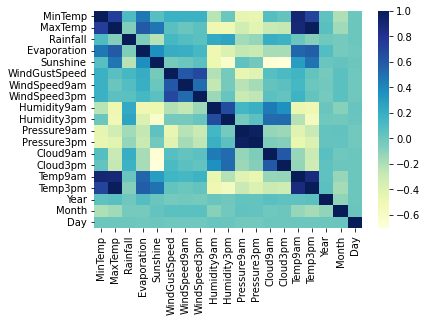

In [23]:
import pandas as pd
import seaborn as sns


corr_matrix = df.corr()


sns.heatmap(corr_matrix, cmap="YlGnBu")

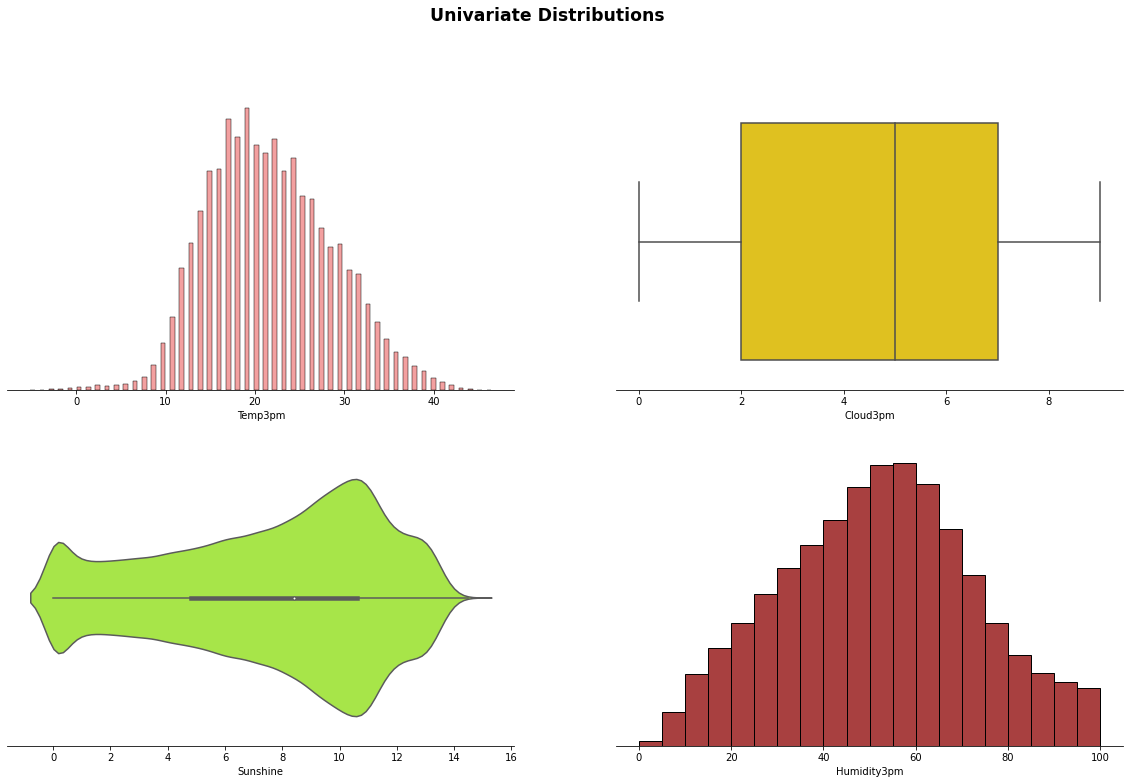

In [24]:
fig=plt.figure(figsize=(20,12),facecolor='white')

plt.suptitle('Univariate Distributions',weight='bold',fontsize='xx-large')

gs=fig.add_gridspec(2,2)

ax=[_ for i in range(4)]

ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])
ax[2]=fig.add_subplot(gs[1,0])
ax[3]=fig.add_subplot(gs[1,1])


sns.histplot(x="Temp3pm",data=df,ax=ax[0],shrink=0.5,bins=50,color="lightcoral")
sns.histplot(x="Humidity3pm",data=df,ax=ax[3],bins=20,color='darkred')
sns.boxplot(x='Cloud3pm',data=df,ax=ax[1],color='gold')
sns.violinplot(x="Sunshine",data=df,ax=ax[2],color="greenyellow")

for i in range(4):
    
    ax[i].set_yticklabels('')
    ax[i].set_ylabel('')
    ax[i].tick_params('y',length=0)
    
    for direction in ['top','left','right']:
        
        ax[i].spines[direction].set_visible(False)

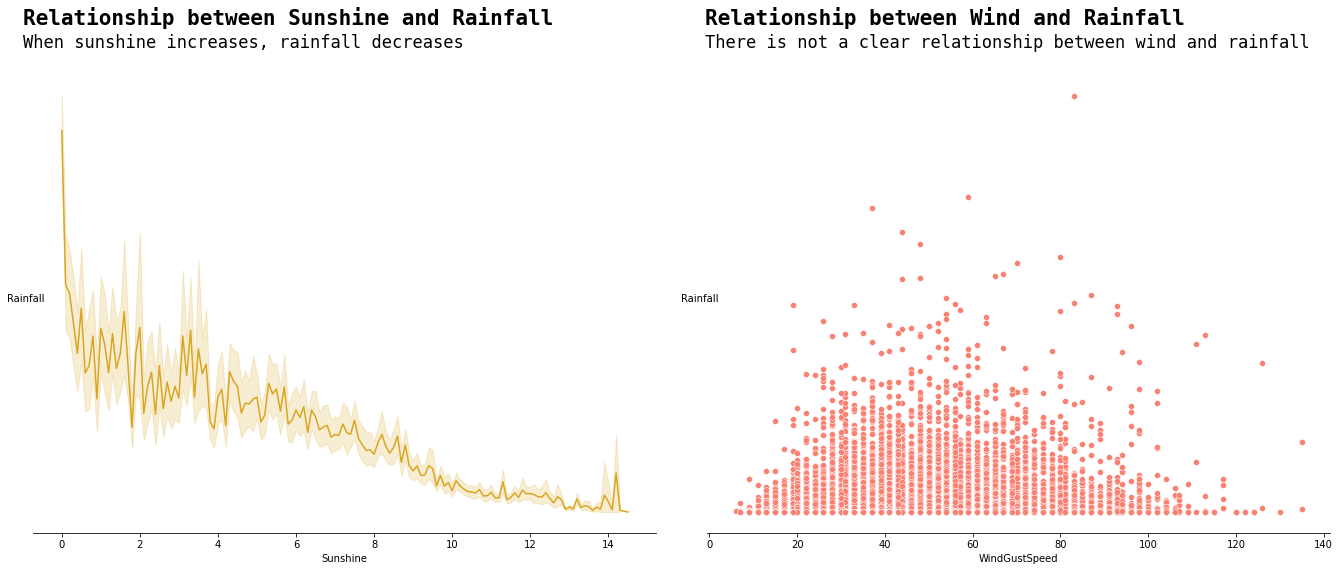

In [25]:
fig=plt.figure(figsize=(20,8),facecolor='white')

gs=fig.add_gridspec(1,2)

ax=[_ for _ in range(2)]
ax[0]=fig.add_subplot(gs[0,0])
ax[1]=fig.add_subplot(gs[0,1])

ax[0].text(-1,15,"Relationship between Sunshine and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[0].text(-1,14.3,"When sunshine increases, rainfall decreases",fontsize=17,fontweight='light', fontfamily='monospace')

ax[1].text(-1,430,"Relationship between Wind and Rainfall",fontsize=21,fontweight='bold', fontfamily='monospace')
ax[1].text(-1,410,"There is not a clear relationship between wind and rainfall",fontsize=17,fontweight='light', fontfamily='monospace')

sns.lineplot(data=df,x='Sunshine',y='Rainfall',ax=ax[0],color='goldenrod')
sns.scatterplot(data=df,x='WindGustSpeed',y='Rainfall',ax=ax[1],color='salmon')

for i in range(2):
    
    ax[i].set_ylabel('Rainfall').set_rotation(0)
    ax[i].set_yticklabels('')
    ax[i].tick_params(axis='y',length=0)
    
    for direction in ['top','right','left']:
        ax[i].spines[direction].set_visible(False)
        
plt.tight_layout()
plt.show()

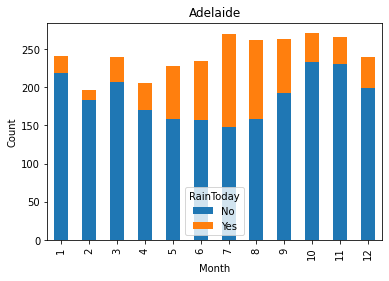

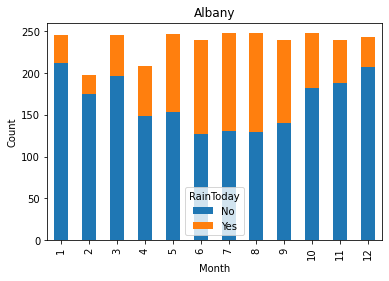

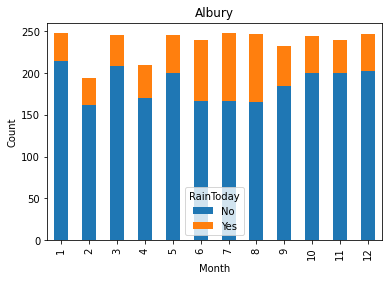

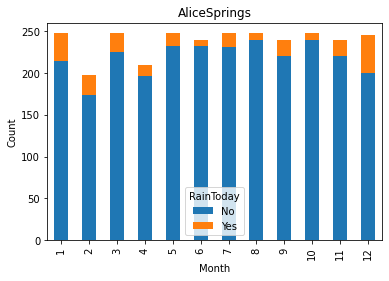

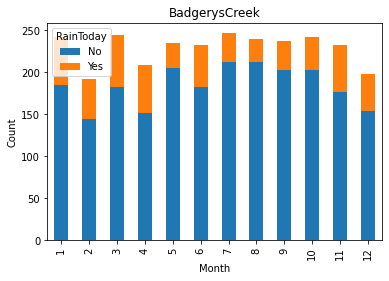

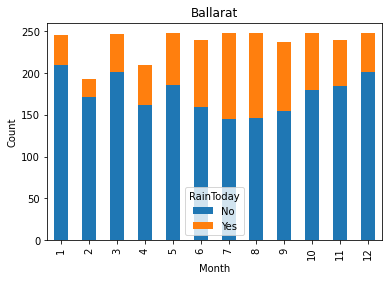

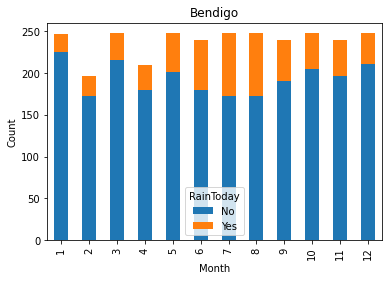

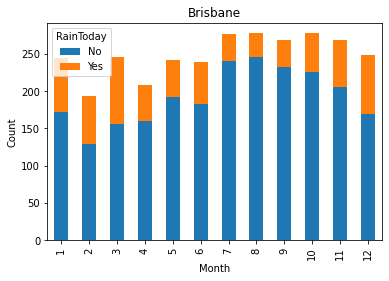

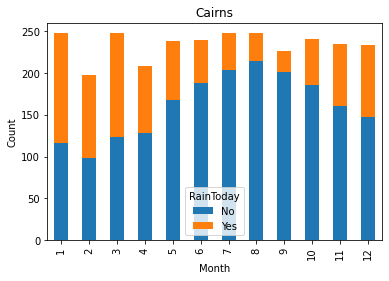

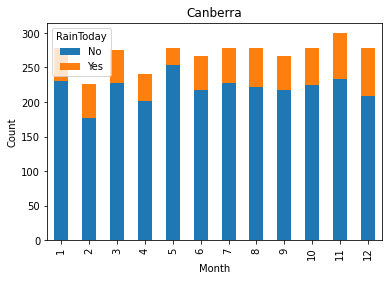

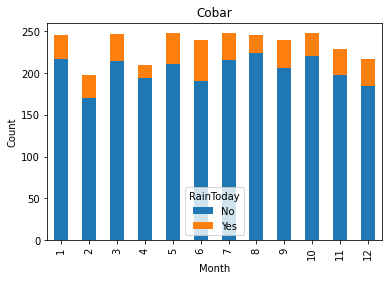

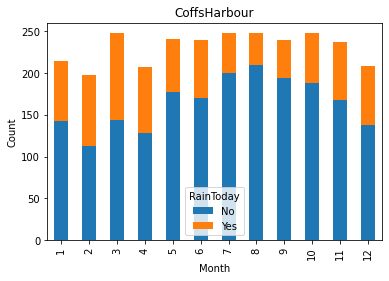

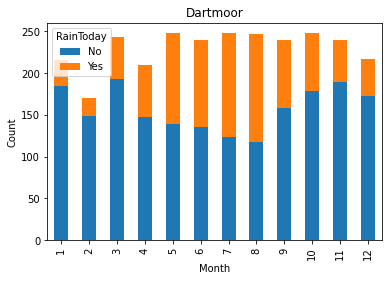

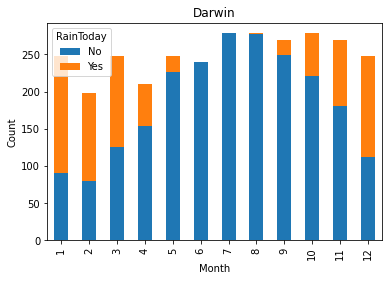

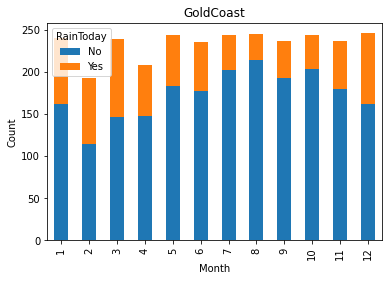

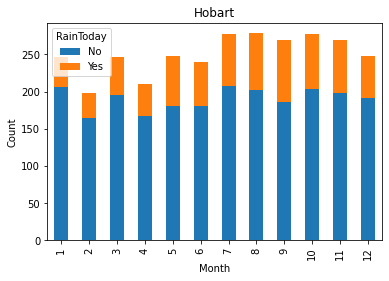

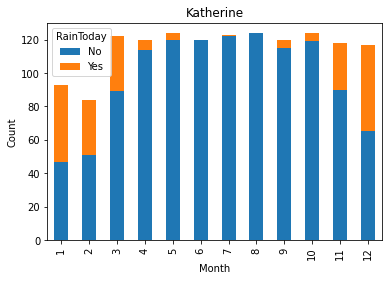

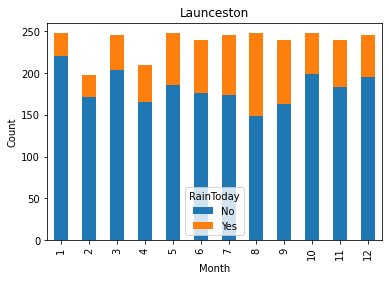

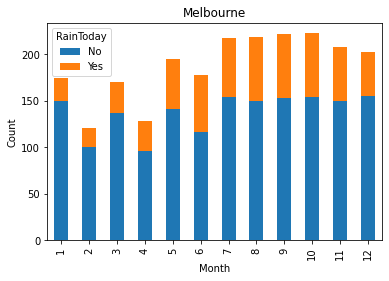

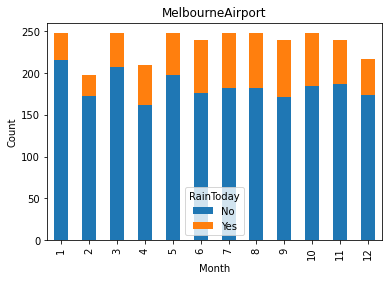

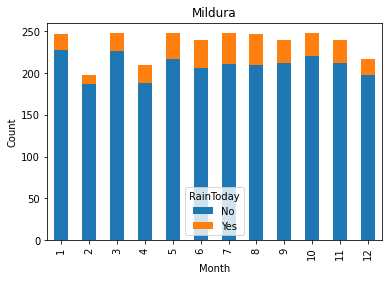

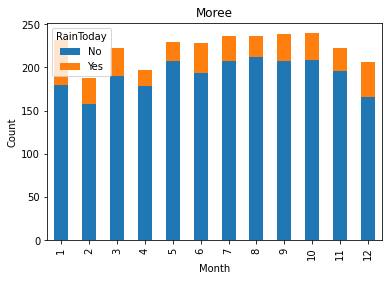

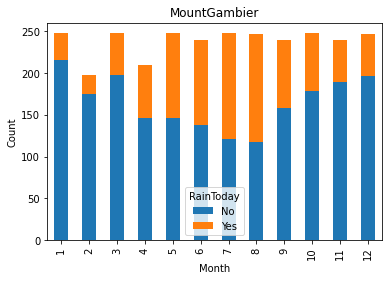

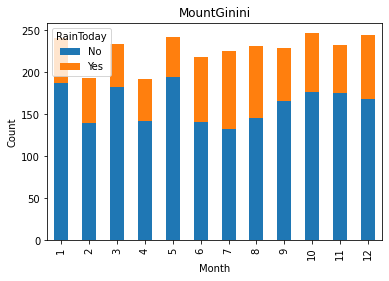

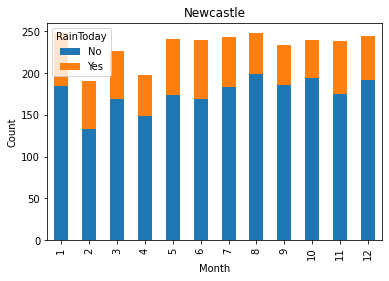

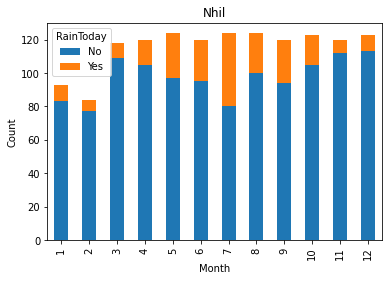

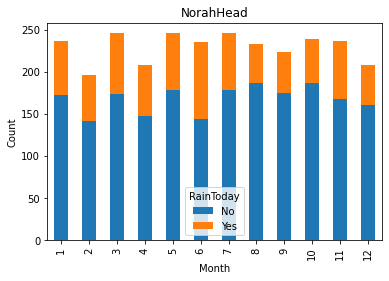

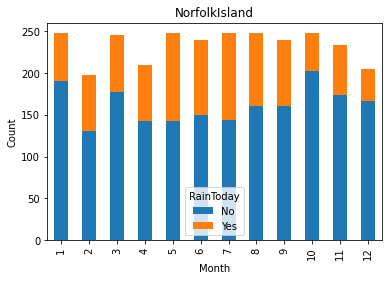

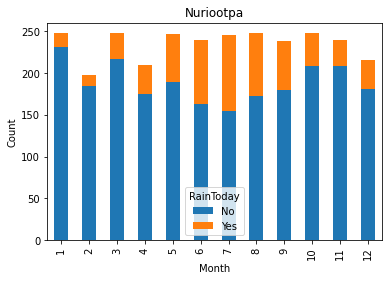

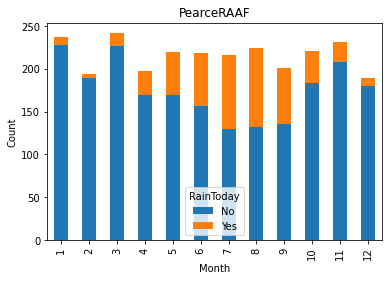

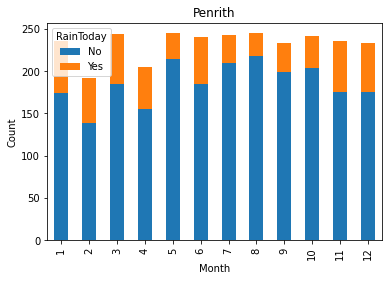

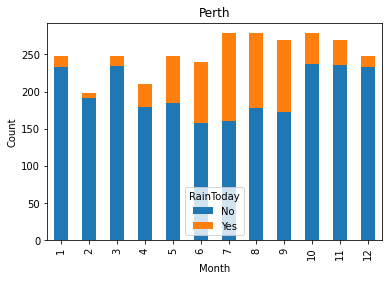

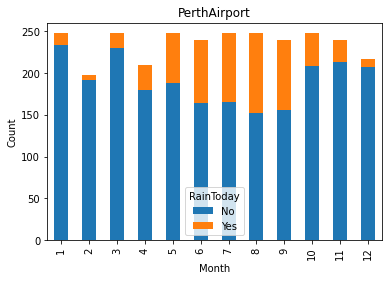

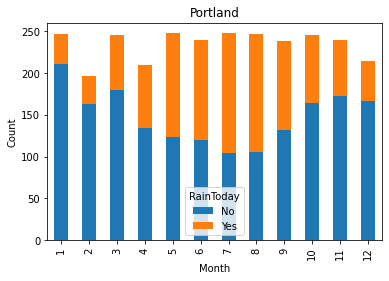

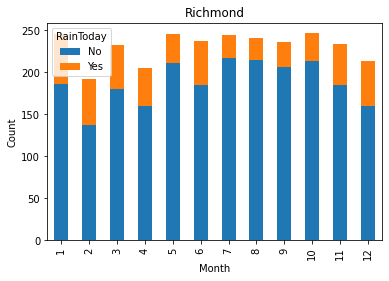

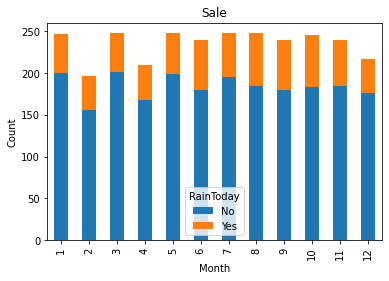

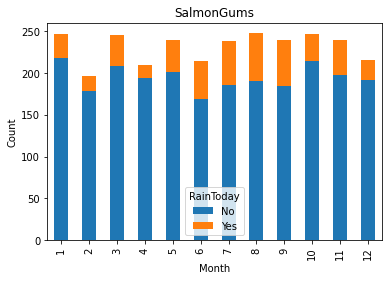

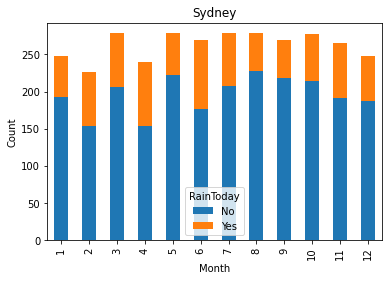

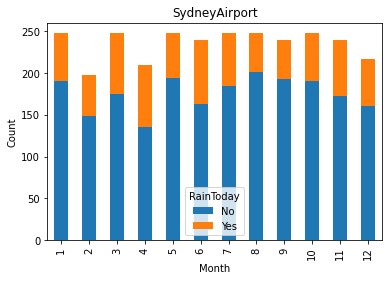

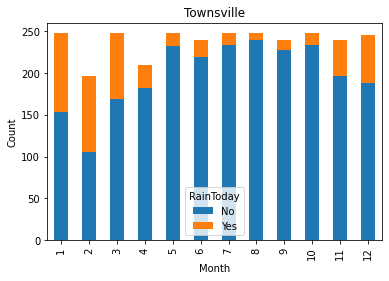

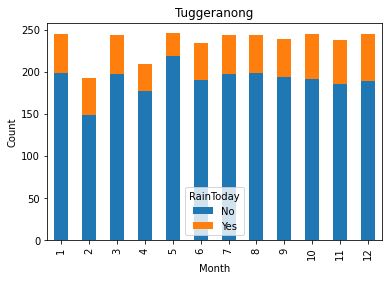

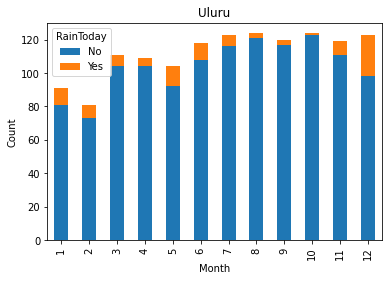

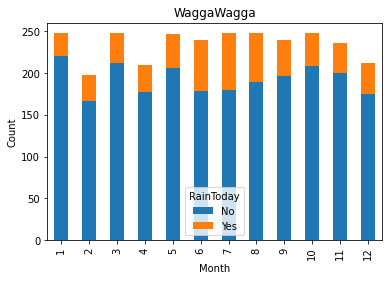

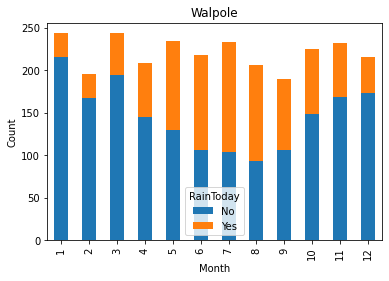

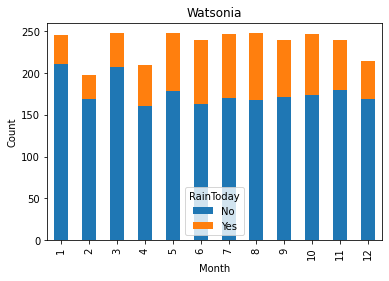

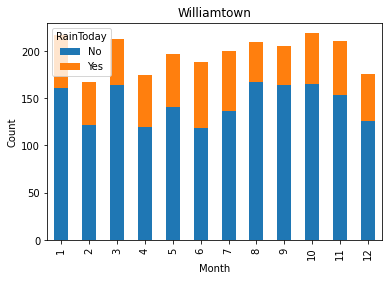

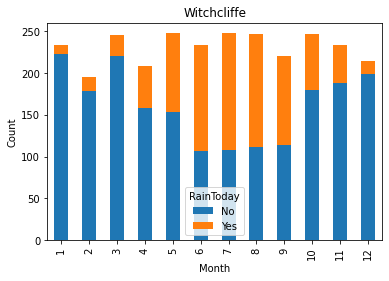

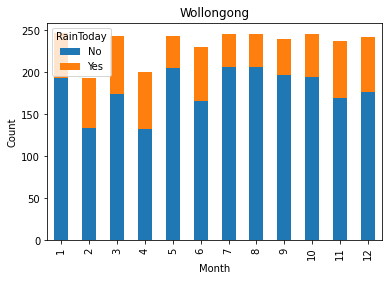

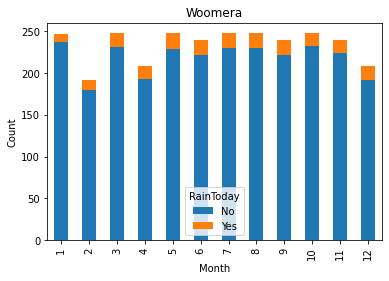

In [34]:
#Monthly Rain fall for each City from 2008-20016

import matplotlib.pyplot as plt

# Read the dataset into a Pandas dataframe
data = df

# Filter the data to exclude the year 2022
data = data[data['Year'] != 2017]

# Group the data by city
grouped_data = data.groupby('Location')

# Loop over each city and plot the graph
for name, group in grouped_data:
    # Group the data by month and RainToday, and count the number of occurrences
    grouped_month = group.groupby(['Month', 'RainToday'])['RainToday'].count().unstack()
    
    # Plot the graph
    ax = grouped_month.plot(kind='bar', stacked=True, title=name)
    ax.set_xlabel("Month")
    ax.set_ylabel("Count")
    plt.show()

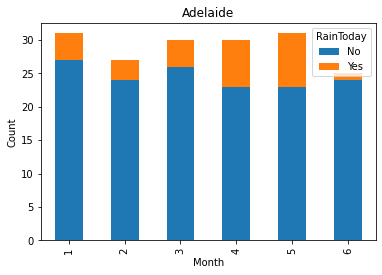

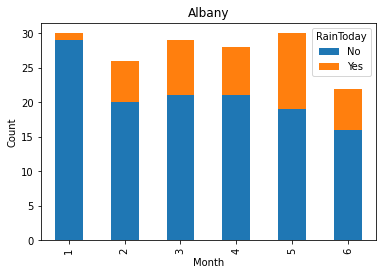

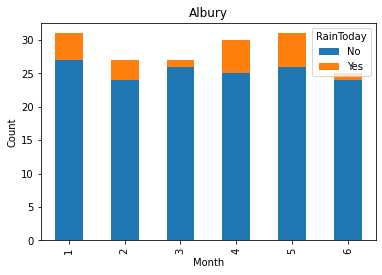

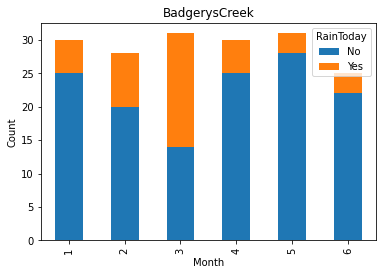

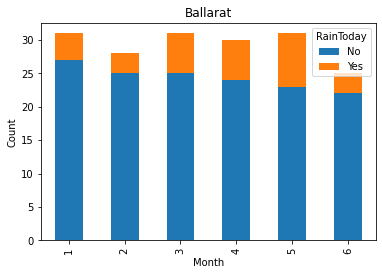

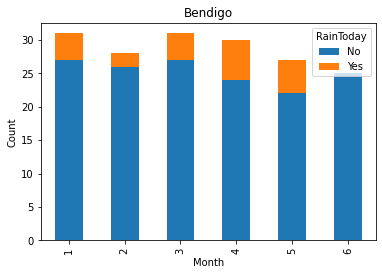

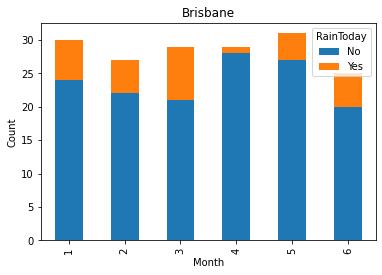

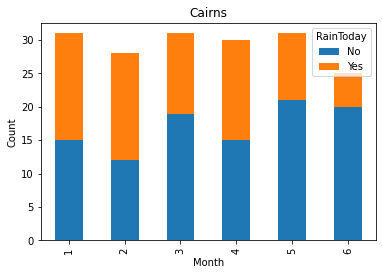

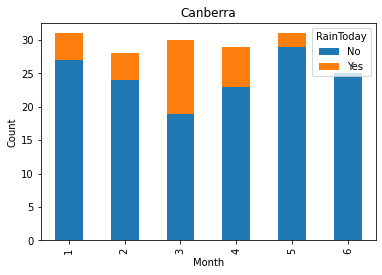

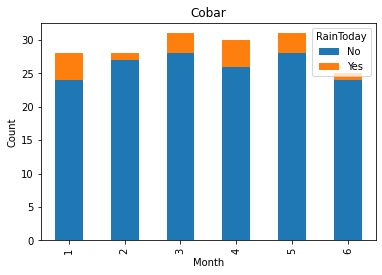

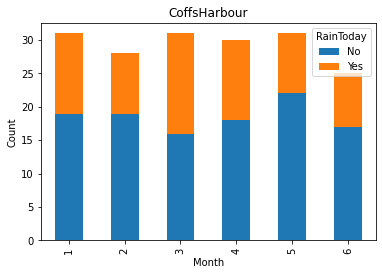

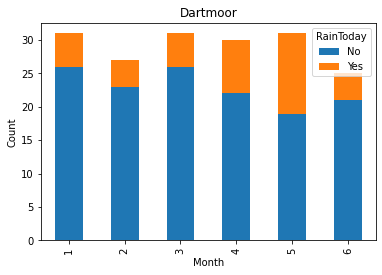

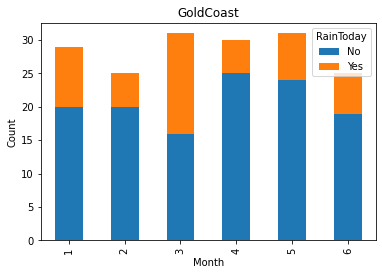

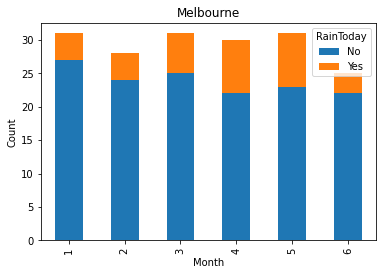

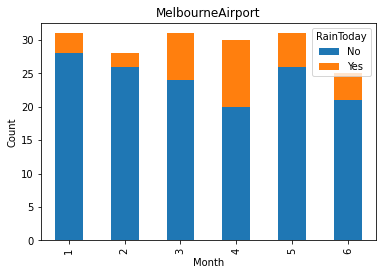

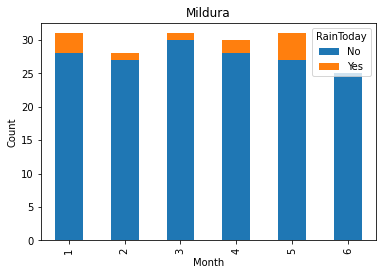

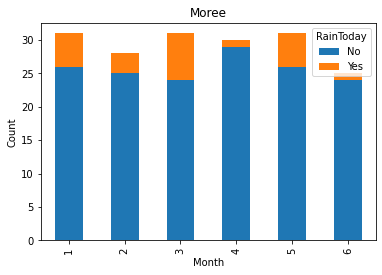

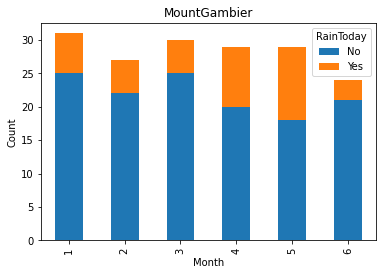

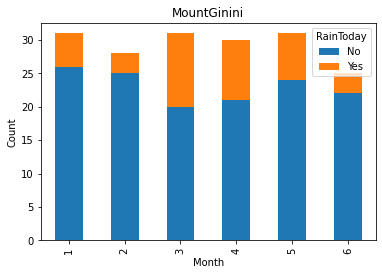

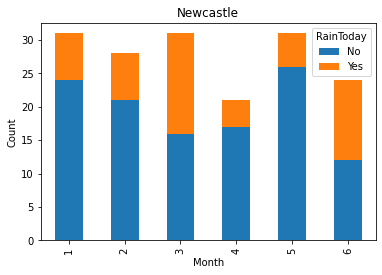

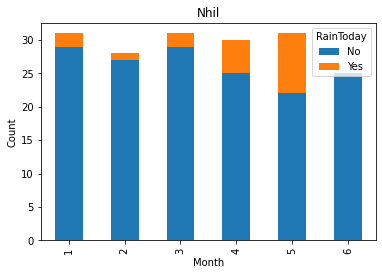

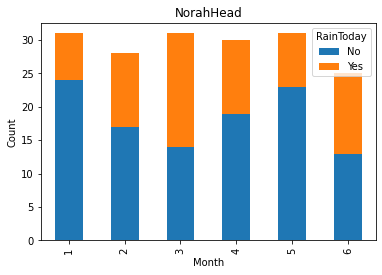

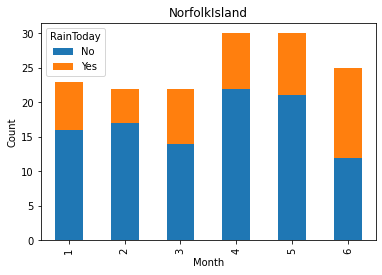

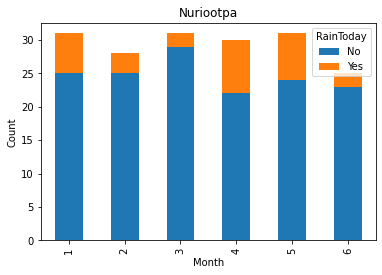

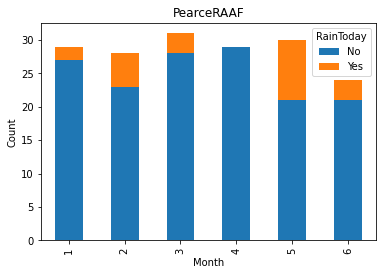

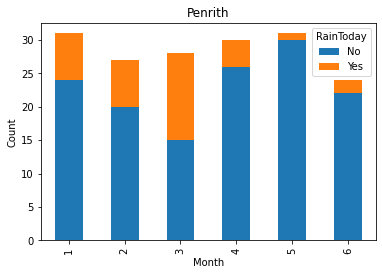

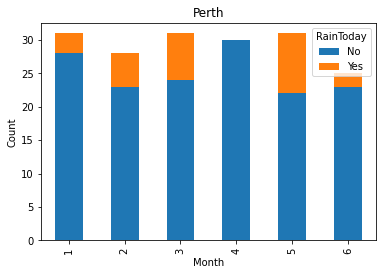

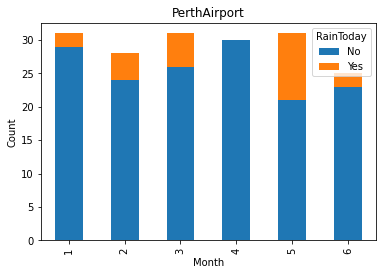

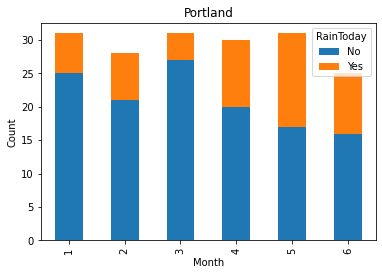

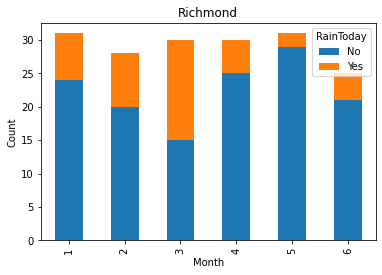

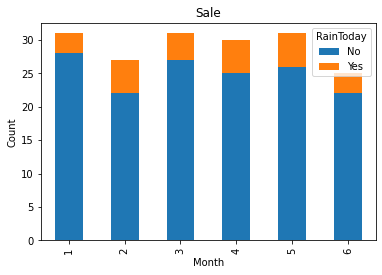

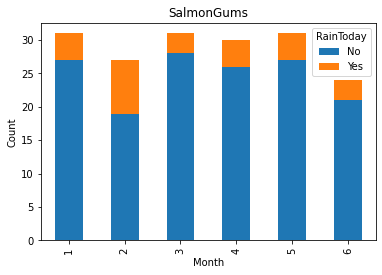

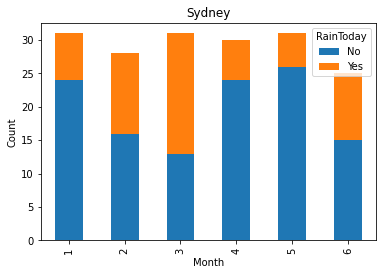

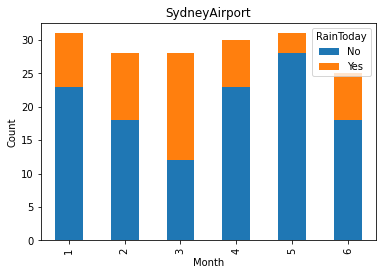

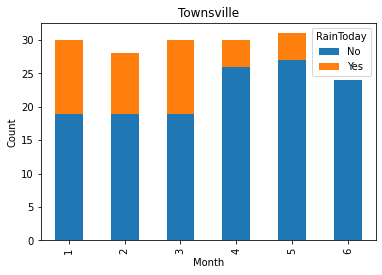

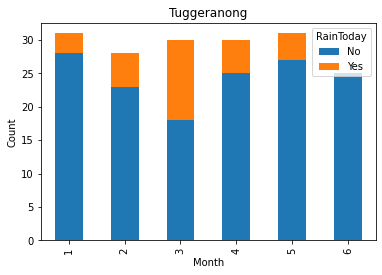

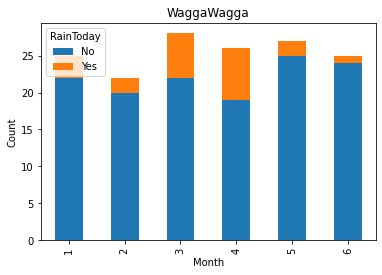

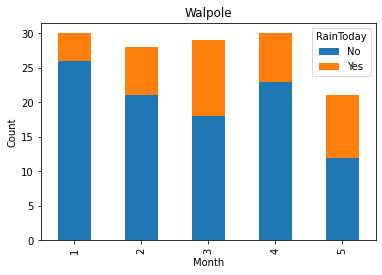

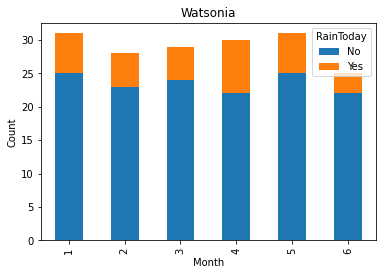

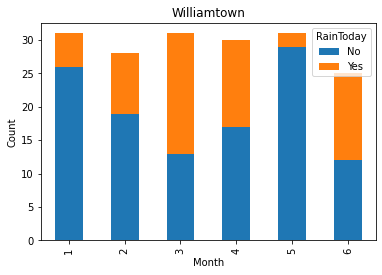

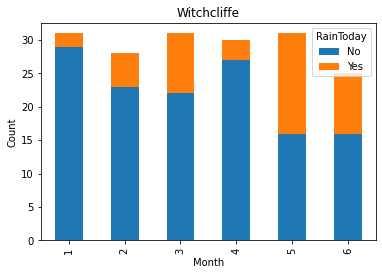

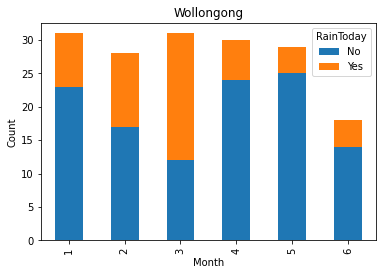

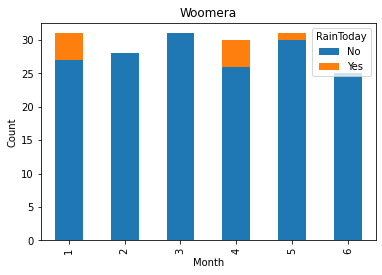

In [7]:
#Monthly test data of year 2017

import matplotlib.pyplot as plt
data = df[df['Year'] == 2017] # filter the dataset by year
# Group the data by city
grouped_data = data.groupby('Location')

# Loop over each city and plot the graph
for name, group in grouped_data:
    # Group the data by month and RainToday, and count the number of occurrences
    grouped_month = group.groupby(['Month', 'RainToday'])['RainToday'].count().unstack()

    # Plot the graph
    ax = grouped_month.plot(kind='bar', stacked=True, title=name)
    ax.set_xlabel("Month")
    ax.set_ylabel("Count")
    plt.show()
